![](https://i2.wp.com/www.clipartmax.com/png/full/115-1152511_indian-premier-league-ipl-2018-logo-png.png?strip=all)

Background:

The Indian Premier League (IPL) is a men's Twenty20 (T20) cricket league that is annually held in India. The league is contested by ten city-based franchise teams. The BCCI founded the league in 2007. The competition is usually held in summer between March and May every year. It has an exclusive window in the ICC Future Tours Programme due to fewer international cricket tours happening during IPL seasons worldwide.

The IPL is the most-popular cricket league in the world; in 2014, it was ranked sixth by average attendance among all sports leagues. In 2010, the IPL became the first sporting event to be broadcast live on YouTube.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Indian_Premier_League)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px

plt.style.use('ggplot')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
auction = pd.read_csv('/kaggle/input/ipl-auction-data-2013-2023/auction.csv', index_col=0)

In [3]:
auction.shape

(1052, 6)

In [4]:
auction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1051
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      1052 non-null   object 
 1   Player       1052 non-null   object 
 2   Team         1052 non-null   object 
 3   Base price   1052 non-null   float64
 4   Winning bid  1052 non-null   object 
 5   Year         1052 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 57.5+ KB


In [5]:
# Preprocessing
auction['Country'] = auction['Country'].apply(lambda x: x[1:] if x[0] == ' ' else x)
auction['Winning bid'] = pd.to_numeric(auction['Winning bid'].str.replace(',', ''))

In [6]:
# Finding the difference between winning bid and base price
auction['Winning bid - Base price'] = auction['Winning bid'] - auction['Base price']

In [7]:
auction.describe().T

,count,mean,std,min,25%,50%,75%,max
Base price,1052.0,65.252091,63.278684,10.0,20.0,30.0,100.0,244.0
Winning bid,1052.0,209.439021,290.055605,10.0,20.0,85.0,280.0,1850.0
Year,1052.0,2018.316540,3.157700,2013.0,2016.0,2018.0,2022.0,2023.0
Winning bid - Base price,1052.0,144.186930,257.702583,0.0,0.0,5.0,183.0,1650.0


In [8]:
# Plotting a map to count the number of players for each country
px.choropleth(auction.loc[~auction['Player'].duplicated()] \
                     .rename(columns={'Player': 'Number of Players'}) \
                     .groupby('Country')['Number of Players'] \
                     .count().reset_index(),
                      locations='Country',
                      locationmode='country names',
                      color='Number of Players',
                      color_continuous_scale='sunset',
                      title='Players Count by Country')

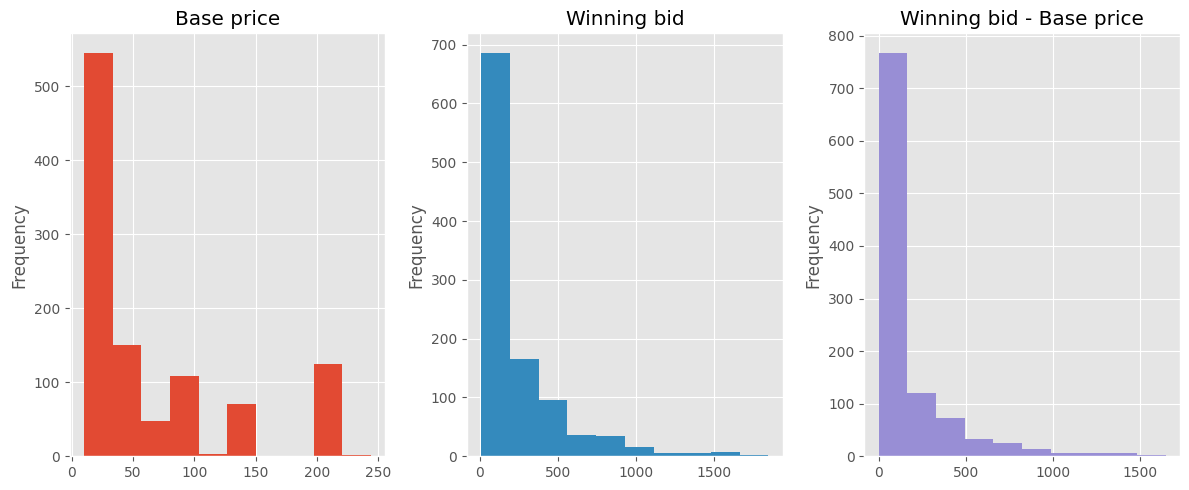

In [9]:
# A lakh (sometimes written lac) is a unit in the Indian numbering system equal to one hundred thousand.
# For example, in India, 150,000 rupees becomes 1.5 lakh rupees.
# Source: https://en.wikipedia.org/wiki/Lakh

# Plotting histograms with numerical values
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, x in enumerate(['Base price', 'Winning bid', 'Winning bid - Base price']):
    ax[i] = auction[x].plot(kind='hist', color=color_pal[i], ax=ax[i]);
    ax[i].set_title(x);

fig.tight_layout()

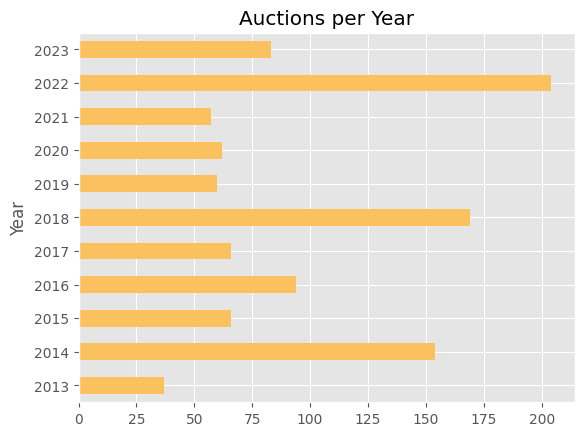

In [10]:
auction['Year'].value_counts().sort_index() \
               .plot(kind='barh', title='Auctions per Year', 
                     color=color_pal[4]);

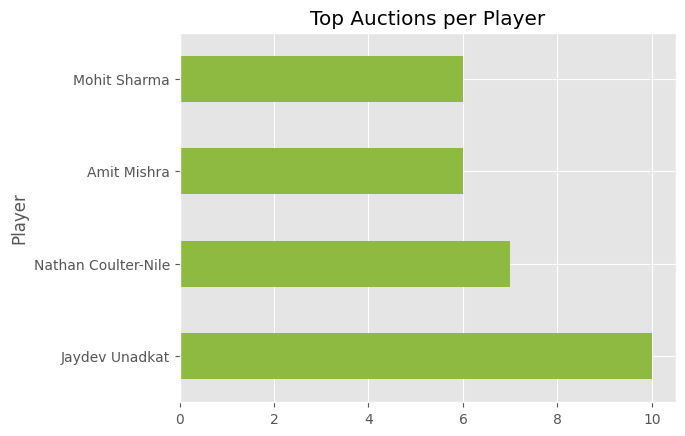

In [11]:
# Top auctions per player
auction.groupby('Player').agg('count') \
                         .iloc[:, 0] \
                         .sort_values(ascending=False) \
                         .head(4) \
                         .plot(kind='barh', color=color_pal[5],
                               title='Top Auctions per Player');